# Previous python running

<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\jcami\AppData\Local\Temp\ipykernel_40500\1113628861.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('.\MWC_ETP_Daily_InfluentQuality_From2014_698890028305835467.csv')


Missing values per column:
recorddate                      0
Ammonia_mg.L-1                  1
BOD_mg.L-1                    420
COD_mg.L-1                     42
NitrateplusNitrite_mg.L-1    1244
Nitrogentotal_mg.L-1         1244
dtype: int64


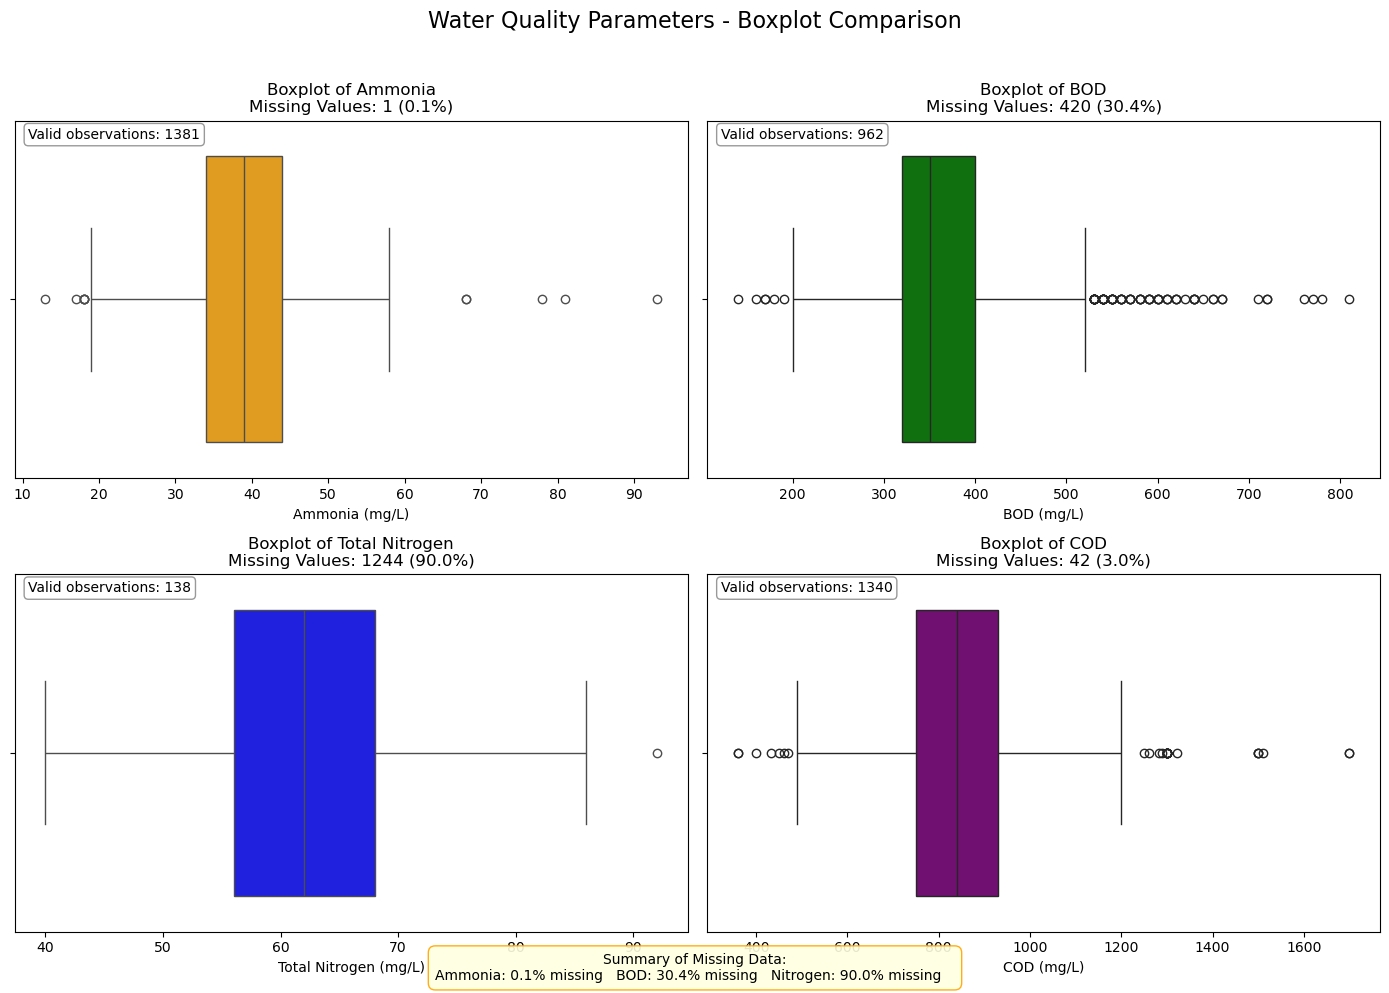

Unparsed rows: 0


,recorddate,Ammonia_mg.L-1,BOD_mg.L-1,COD_mg.L-1,NitrateplusNitrite_mg.L-1,Nitrogentotal_mg.L-1
1,2014-01-01 20:00:00,27.0,NaN,730.0,NaN,NaN
116,2014-01-04 20:00:00,41.0,NaN,945.0,NaN,NaN
201,2014-01-05 21:00:00,29.0,NaN,800.0,NaN,NaN
59,2014-01-06 21:00:00,31.0,NaN,710.0,NaN,NaN
81,2014-01-07 21:00:00,44.0,NaN,695.0,NaN,NaN
...,...,...,...,...,...,...
1355,2019-11-06 21:00:00,44.0,260.0,870.0,NaN,NaN
1230,2019-12-02 20:00:00,32.0,370.0,880.0,NaN,NaN
1256,2019-12-03 20:00:00,25.0,390.0,980.0,NaN,NaN
1311,2019-12-05 21:00:00,43.0,330.0,830.0,NaN,NaN


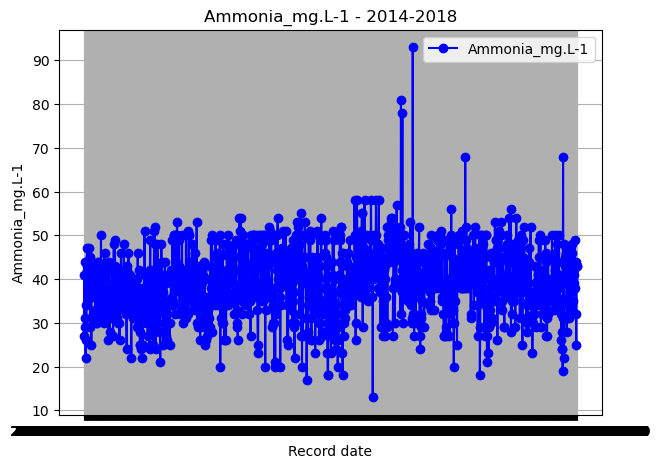

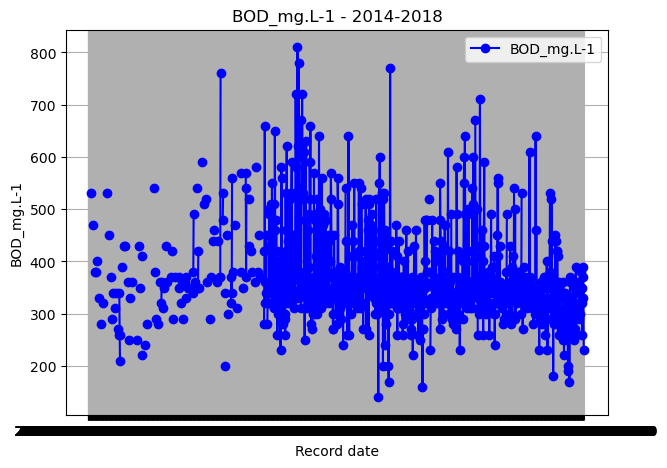

427363
35775


,Contribution type,Minimum flow rate (m3/day),Average flow rate (m3/day),Maximum flow rate (m3/day)
0,Domestic,18360.000,61200.00,116280.000
1,Commercial,2390.724,7969.08,15141.252
2,Infiltration,11657.000,11657.00,11657.000
3,Total,32407.724,80826.08,143078.252


,Contribution type,Minimum flow rate (m3/day),Average flow rate (m3/day),Maximum flow rate (m3/day)
0,Domestic,23077.602,76925.34,23077.602
1,Commercial,3005.100,10017.00,3005.100
2,Infiltration,13988.400,13988.40,13988.400
3,Total,40071.102,100930.74,179178.846


0.48461538461538456
0.018430387755252492
0.41843038775525254
0.5323761757789536
1.3
2
0.24535675103188628
The velocity upstream the screen is: 0.7142857142857143
the head loss screen is: 0.04
the flow depth upstream is: 1.04
The weat area  is: 2.9033609305555546
The suitable width channel is: 2.8000000000000003 m
The number of screen should be: 3
The depth flow controlled by a hydraulic structure should be less than 0.34274428382464095 m in order to comply with the minimum velocity with the average current flow.


,Time of Day,Qavg (m³/hr),Flow distribution Q (m³/hr),Difference (Flow-Qavg) (m³/hr),Amount to Storage (m³),Amount from Storage (m³),Running Total in Storage (m³)
0,0 to 1,4205.447500,2523.268500,-1682.179000,0.000000,1682.179000,0.000000
1,1 to 2,4205.447500,2102.723750,-2102.723750,0.000000,2102.723750,0.000000
2,2 to 3,4205.447500,1682.179000,-2523.268500,0.000000,2523.268500,0.000000
3,3 to 4,4205.447500,1261.634250,-2943.813250,0.000000,2943.813250,0.000000
4,4 to 5,4205.447500,1261.634250,-2943.813250,0.000000,2943.813250,0.000000
5,5 to 6,4205.447500,1682.179000,-2523.268500,0.000000,2523.268500,0.000000
6,6 to 7,4205.447500,2523.268500,-1682.179000,0.000000,1682.179000,0.000000
7,7 to 8,4205.447500,2943.813250,-1261.634250,0.000000,1261.634250,0.000000
8,8 to 9,4205.447500,3364.358000,-841.089500,0.000000,841.089500,0.000000
9,9 to 10,4205.447500,3784.902750,-420.544750,0.000000,420.544750,0.000000


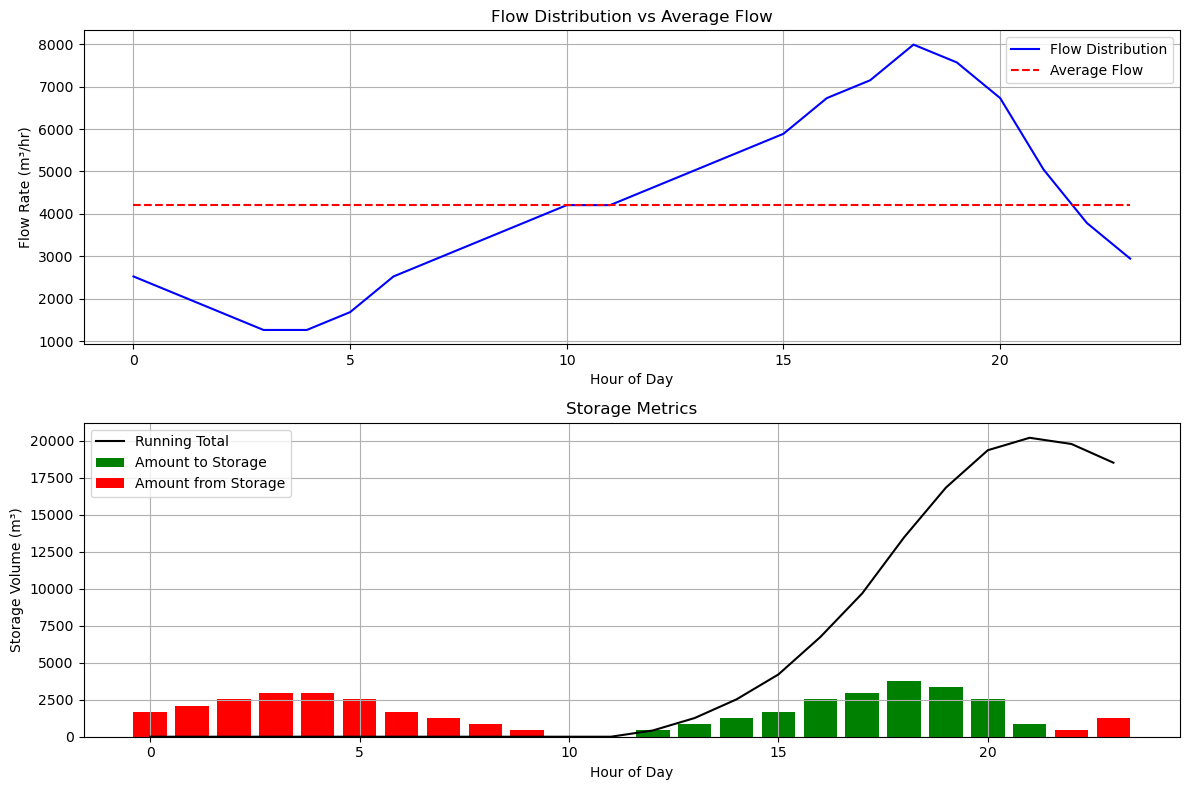

24000.0
Time of residence for SS removal: 1.79 hours
Time of residence for BOD removal: 1.35 hours
Total volume of clarifier tanks (using SS removal time): 38093.48 m³
Detention time for average dry weather flow rate: 3.65 hours
Volume of clarifier tanks (using maximum detention time for AWD): 26100.00 m³
Excess volume of clarifier tanks (equalization tank volume): 11993.48 m³
New peak hourly flow rate: 4.04 m³/s
Volume of one clarifier tank: 14137.17 m³
Number of clarifier tanks: 2
Diameter of the clarifier tank: 57.65 m
88.88888888888889
125.0
400.0
53333.333333333336
66.66666666666667
aereation volumen is: 11111.111111111111
aereation time is: 3.3333333333333335
BOD load is: 1296.0
specific utilisation ratio is: 0.36
sludge age is: 6.410256410256411
sludge age increased is: 8.333333333333334
contact tank is: 2222.222222222222
stabilization volumen tank is: 8888.888888888889
contact tank deth is: 5
contact tank length is: 20
contact tank width: 22.22222222222222
Stabilization tank le

In [4]:
run Group_10_Advance_water_treatment.ipynb

# Infiltration

This section is to calculate the infiltration

In [10]:
#relevant libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#From https://www.abs.gov.au/census/find-census-data/quickstats/2021/SAL22315 the data of
#Meblurne subburbs population and area was optained

#creation of data frame based on population data
df = pd.read_csv('./melbourne_density.csv')


total_melbourne_population=df["Population"].sum()
total_melbourne_area=df["Area (km2)"].sum()

print("The total melbourne population is: " + str(total_melbourne_population))
print("The total melbourne area is: " + str(total_melbourne_area))

PE_domestic=PE_domestic #variable defined in previous python calculation notebook
print("The suburb under design population is: " + str(PE_domestic))
print(str(PE_domestic))
print(str(PE_commercial))

#estimation of under study suburb area based on area per population ratio

estimated_area=(total_melbourne_area/total_melbourne_population)*PE_domestic

print("The estimated area of the understudy suburb is: " + str(estimated_area) + 'km2')

#converting the estimated area into ha

estimated_area=estimated_area*100

print('The estimated area of the understudy suburb is: ' + str(estimated_area) + 'ha')

#from Metcalf and Eddy the infiltration for swewer can be estimated as 0.2 to 28 m3/ha/d
#lower value is taken as it is a new swewer

infiltration_ratio=0.2

infiltration=estimated_area*infiltration_ratio

print('The estimated infiltration is: ' + str(infiltration) +'m3/d')

#exporting data frame to latex
latex_table = df.to_latex(index=False, caption='Melbourne suburbs with area and population', label='tab:mel_subs')
with open("../document/melbourne_density.tex", "w") as f:
    f.write(latex_table)




The total melbourne population is: 4703875
The total melbourne area is: 7832.930000000001
The suburb under design population is: 340000
340000
28461
The estimated area of the understudy suburb is: 566.1706996890863km2
The estimated area of the understudy suburb is: 56617.06996890863ha
The estimated infiltration is: 11323.413993781727m3/d


In [4]:
from insert_text_in_tex import insert_text_in_tex

file_path = "../document/document.tex"
keyword   = "trial"
text_block = [
    "Here’s the first new line.",
    "And here’s the second."
]

success = insert_text_in_tex(file_path, keyword, text_block)
print("Inserted:", success)


Inserted: True
